In [1]:
from model import ReconfigurationNetwork
from PIL import Image
import torch
from torchvision.transforms import Compose, Grayscale, ToTensor
import matplotlib.pyplot as plt

In [2]:
model = ReconfigurationNetwork()
model.load_state_dict(torch.load('./model/best_model.pt'))
model.eval()
model = model.to('cuda')
imgpath = "./image/img.PNG"
img = Image.open(imgpath).convert('L')
transform = Compose([Grayscale(), ToTensor()])
img = transform(img)
img = img.to('cuda')
img = img.unsqueeze(0)
y = model(img)
residual = torch.abs(img[0][0]-y[0][0])

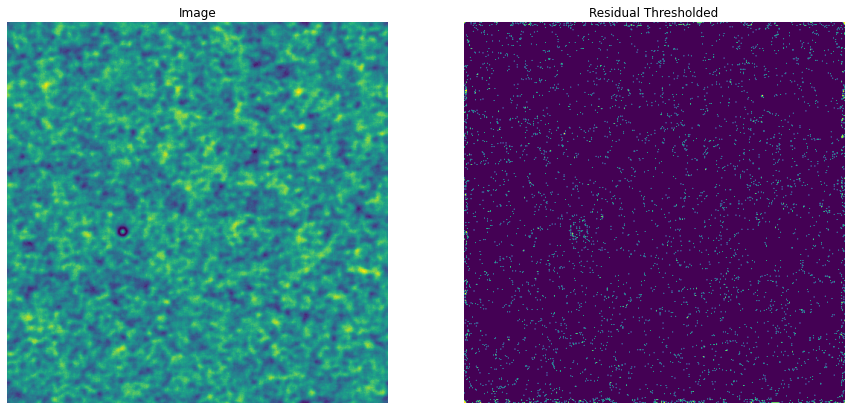

In [8]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(img.detach().cpu().numpy()[0][0])
plt.title('Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(residual.detach().cpu().numpy()>0.005)
plt.title('Residual Thresholded')
plt.axis('off')
plt.show()